In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
#sample data
X= np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y= np.array([1,4,9,16,25,36,49,64,81,100])

In [38]:
#transform to polynomial features (degree2)
poly= PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)

In [39]:
#fit model
model = LinearRegression()
model.fit(X_poly,y)

LinearRegression()

In [40]:
#predictions
y_pred=model.predict(X_poly)
y_pred

array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

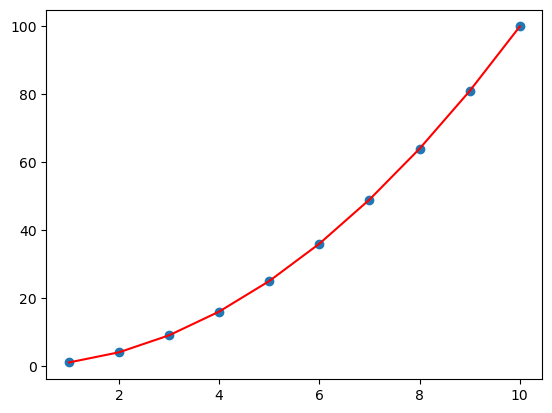

In [41]:
plt.scatter(X,y)
plt.plot(X,y_pred,color="red")
plt.show()

In [42]:
#_______________________________________________________________________________________________________________________

In [43]:
#1. load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
cols=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]

df=pd.read_csv(url,sep="\\s+", names=cols, na_values="?")

In [44]:
#2. preprocessing
df = df.dropna(subset=["horsepower","mpg"])
x=df[["horsepower"]].astype(float).values
y=df["mpg"].values

In [45]:
#3. train-test-split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
#4. linear regression(degress 1)
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred_linear = linear_model.predict(x_test)

In [47]:
#rmse using numpy
rmse_linear = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2_linear = r2_score(y_test,y_pred_linear)

print("linear regression (degree 1)")
print("test rmse : ", rmse_linear)
print("test r2 : ", r2_linear)

linear regression (degree 1)
test rmse :  4.706722545876633
test r2 :  0.5659681822256184


In [48]:
#5. polynomial regression (degree 3, ridge)
degree= 3
poly= PolynomialFeatures(degree=degree, include_bias=False)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

poly_model = Ridge(alpha=1.0)
poly_model.fit(x_train_poly,y_train)
y_pred_poly= poly_model.predict(x_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test,y_pred_poly))
r2_poly=r2_score(y_test,y_pred_poly)

print("Polynomial Regression (degree : ",degree,")")
print("total rmse : ", rmse_poly)
print("test r2 : ", r2_poly)

Polynomial Regression (degree :  3 )
total rmse :  4.296449880587221
test r2 :  0.6383371739768814


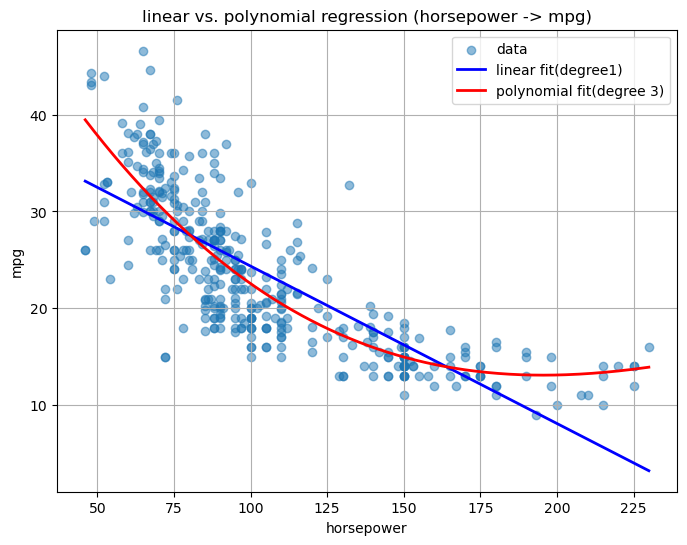

In [49]:
#6. plot comparision
x_range=np.linspace(x.min(),x.max(),300).reshape(-1,1)
y_range_linear=linear_model.predict(x_range)
y_range_poly=poly_model.predict(poly.transform(x_range))

plt.figure(figsize=(8,6))
plt.scatter(x,y,alpha=0.5, label="data")
plt.plot(x_range,y_range_linear,color="blue",linewidth=2,label="linear fit(degree1)")
plt.plot(x_range,y_range_poly,color="red",linewidth=2,label="polynomial fit(degree 3)")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.title("linear vs. polynomial regression (horsepower -> mpg)")
plt.legend()
plt.grid(True)
plt.show()